### LOGISTIC REGRESSION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train["Pclass"].dtype

dtype('int64')

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:

a=train[train["Age"].isnull()]
a.count()

PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64

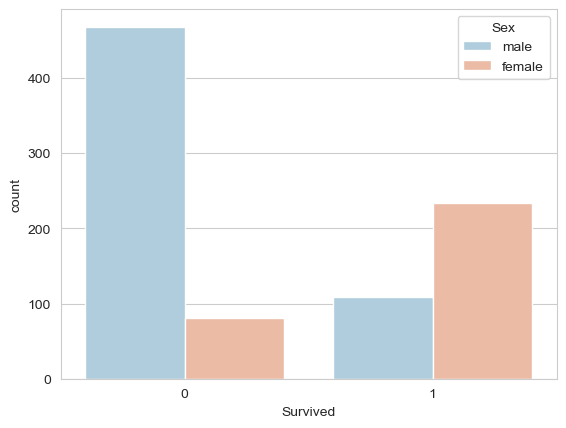

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,hue="Sex",palette='RdBu_r')
plt.show()

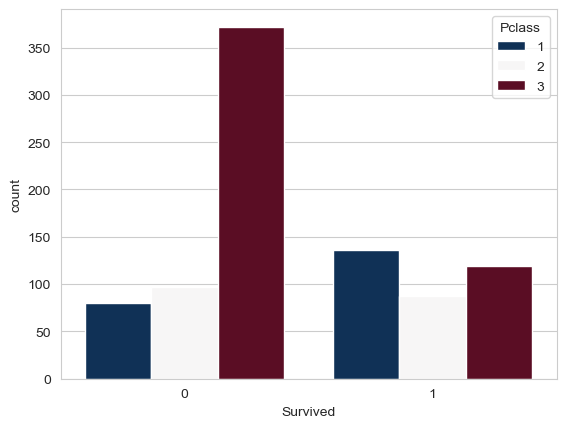

In [9]:
sns.countplot(x='Survived',data=train,hue="Pclass",palette='RdBu_r')
plt.show()

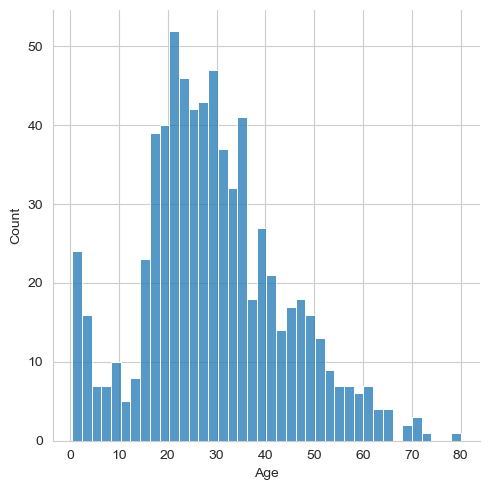

In [10]:
sns.displot(train["Age"].dropna(),bins=40)
plt.show()

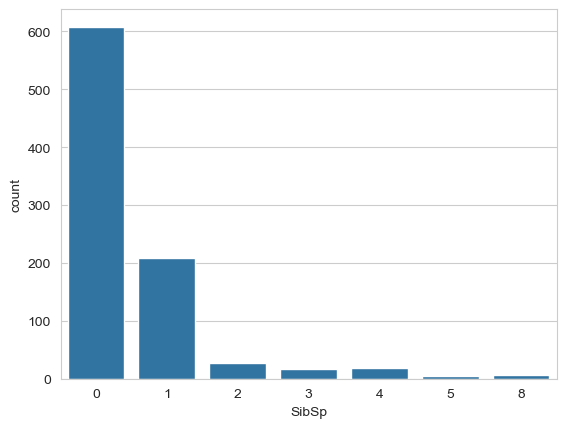

In [11]:
sns.countplot(x="SibSp",data=train)
plt.show()

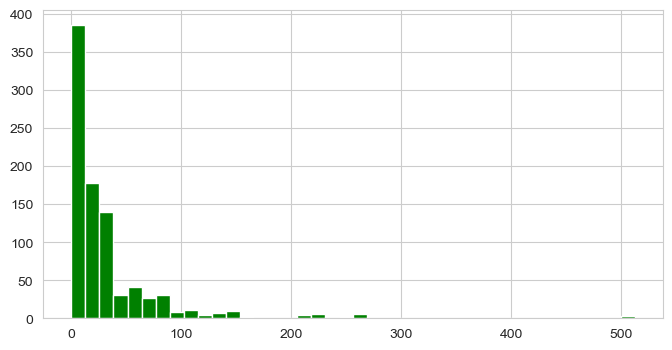

In [12]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

In [13]:
import cufflinks as cf
cf.go_offline()

In [14]:
train["Fare"].iplot(kind= "hist", bins =80)

###  dealing with missing data 


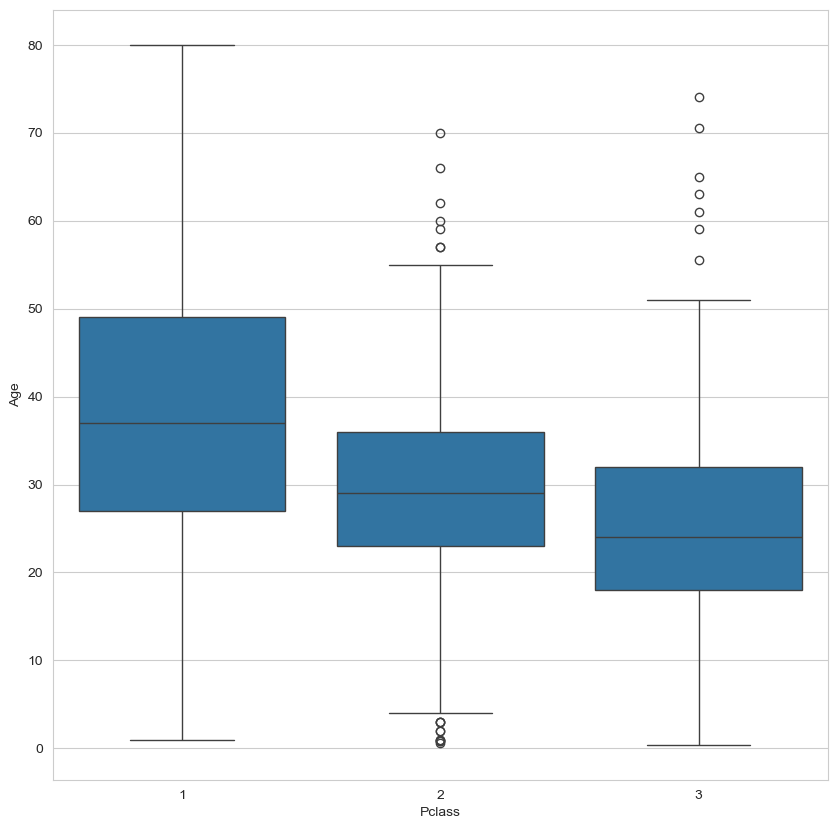

In [16]:
# based on the class 
plt.figure(figsize=(10,10))
sns.boxplot(x="Pclass" , y= "Age",data=train)
plt.show()

In [17]:
for i in range(1, 4):
    median_age = np.median(train[train["Pclass"] == i]["Age"].dropna())
    print(f"Pclass {i} - Median Age: {median_age}")


Pclass 1 - Median Age: 37.0
Pclass 2 - Median Age: 29.0
Pclass 3 - Median Age: 24.0


In [18]:
def impute_age(row):
    if pd.isnull(row["Age"]):
        if row["Pclass"] == 1:
            return 37
        elif row["Pclass"] == 2:
            return 29
        else:
            return 24
    else:
        return row["Age"]
train["Age"]=train.apply(impute_age,axis=1)

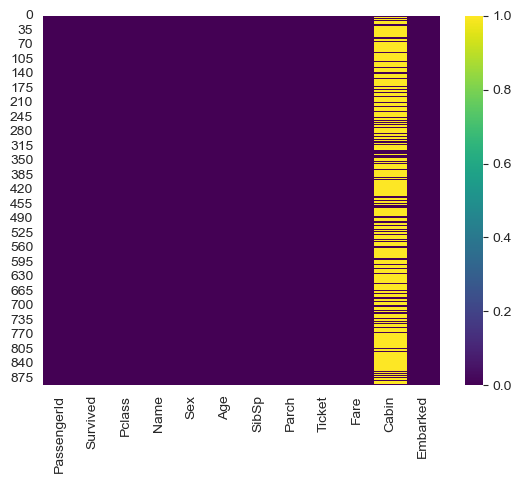

In [19]:

sns.heatmap(train.isnull(),cmap="viridis")
plt.show()

In [20]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df["Age"]=df.apply(impute_age,axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
#converts categorical variables to numerical values so 
#that an ML model can take it as input

sex=pd.get_dummies(df["Sex"],drop_first=True).astype(int)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [24]:


df=pd.concat([df,sex],axis=1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [25]:
df.drop(["Name","Sex","Ticket","Embarked"],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male
0,1,0,3,22.0,1,0,7.2500,NaN,1
1,2,1,1,38.0,1,0,71.2833,C85,0
2,3,1,3,26.0,0,0,7.9250,NaN,0
3,4,1,1,35.0,1,0,53.1000,C123,0
4,5,0,3,35.0,0,0,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN,1
887,888,1,1,19.0,0,0,30.0000,B42,0
888,889,0,3,24.0,1,2,23.4500,NaN,0
889,890,1,1,26.0,0,0,30.0000,C148,1


In [26]:
df.drop("PassengerId",axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male
0,0,3,22.0,1,0,7.2500,NaN,1
1,1,1,38.0,1,0,71.2833,C85,0
2,1,3,26.0,0,0,7.9250,NaN,0
3,1,1,35.0,1,0,53.1000,C123,0
4,0,3,35.0,0,0,8.0500,NaN,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,NaN,1
887,1,1,19.0,0,0,30.0000,B42,0
888,0,3,24.0,1,2,23.4500,NaN,0
889,1,1,26.0,0,0,30.0000,C148,1


In [27]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [29]:
ss=df
ssPclass=pd.get_dummies(ss["Pclass"],drop_first=True).astype(int)
ssPclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [61]:
pd.concat([ss,ssPclass])
ss.drop("Cabin",axis=1,inplace=True)
ss

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,24.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


### BUILDING THE LOGISTIC REGRESSION MODEL

In [110]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [112]:
from sklearn.model_selection import train_test_split

In [114]:
x_train , x_test ,y_train ,y_test =  train_test_split(x,y,test_size=0.3,random_state=101)

In [116]:
from sklearn.linear_model import LogisticRegression

In [118]:
lgr=LogisticRegression()

In [120]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [122]:
predictions=lgr.predict(x_test)

In [124]:
from sklearn.metrics import classification_report


In [126]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [106]:
from sklearn.metrics import confusion_matrix

In [108]:
cm=confusion_matrix(y_test , predictions)
cm

array([[132,  22],
       [ 39,  75]], dtype=int64)

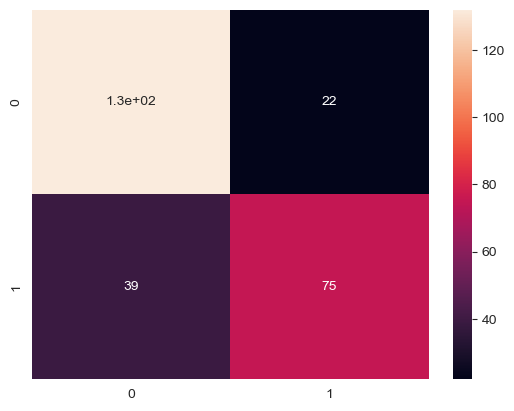

In [82]:
sns.heatmap(cm , annot =True)
plt.show()